In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение (Версия для Python 3)

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [3]:
sample = np.random.choice([1,2,3,4,5,6], 100)

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [4]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({3: 23, 5: 21, 1: 16, 4: 15, 6: 14, 2: 11})
Вероятности выпадений каждой из сторон:
{1: 0.16, 5: 0.21, 3: 0.23, 4: 0.15, 2: 0.11, 6: 0.14}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [5]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

Эмпирическая функция распределения для полученной выборки:

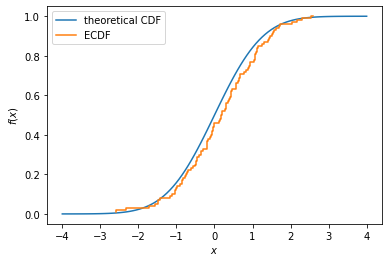

In [37]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

Text(0.5, 0, '$x$')

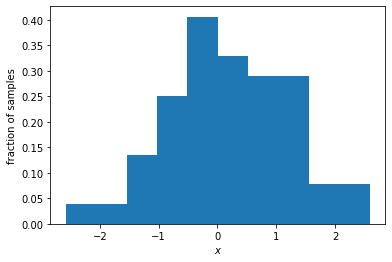

In [6]:
plt.hist(sample, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

Text(0.5, 0, '$x$')

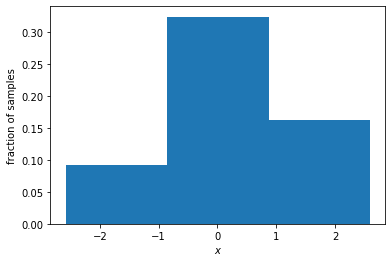

In [7]:
plt.hist(sample, bins=3, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

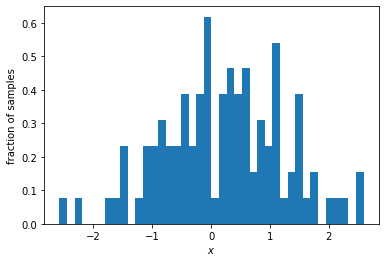

In [8]:
plt.hist(sample, bins=40, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

Text(0.5, 0, '$x$')

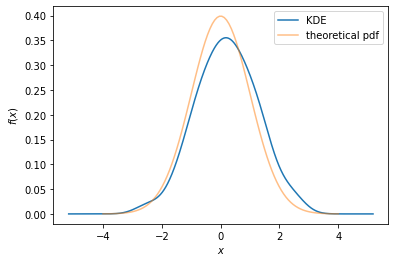

In [80]:
# для построения используем библиотеку Pandas:

df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## Распределение хи квадрат

Сгенерируем выборку случайной величины с распределением хи-квадрат (n=10).

In [88]:
chi2_rv = sts.chi2(30)
sample_chi2_rv = chi2_rv.rvs(200)

Сравним теоретическую и диаграмму сгенерированного распределения.

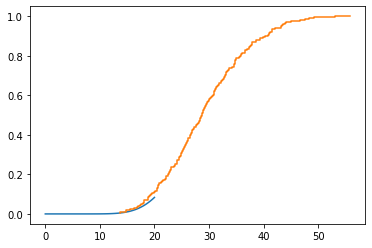

In [89]:
x = np.linspace(0, 20, 100)
cdf_chi2_rv = chi2_rv.cdf(x)
plt.plot(x, cdf_chi2_rv, label='theoretical')

# получение эксперементальной фунции распределения по выборке
ecdf_chi2 = ECDF(sample_chi2_rv)
plt.step(ecdf_chi2.x, ecdf_chi2.y, label='experiment')

Построим гистограмму выборки

Text(0.5, 0, 'x')

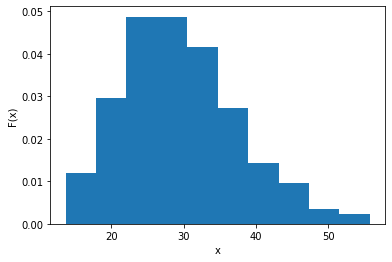

In [90]:
plt.hist(sample_chi2_rv, density=True)
plt.ylabel('F(x)')
plt.xlabel('x')

Проведем эмперичыескую оценку случайной величины с помощью ядерного сглаживания.

Text(0, 0.5, 'pdf')

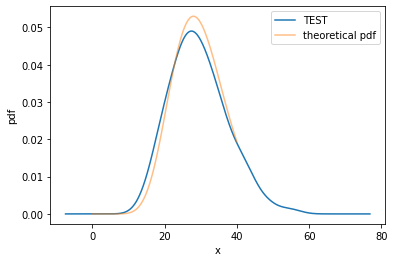

In [91]:
df = pd.DataFrame(sample_chi2_rv, columns=['TEST'])
ax_chi2_rv = df.plot(kind='density')
x = np.linspace(0, 40, 100)
pdf_chi2_rv = chi2_rv.pdf(x)
plt.plot(x, pdf_chi2_rv, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('pdf')

In [78]:
df

,TEST
0,9.984898
1,15.760638
2,1.551085
3,8.020805
4,9.720791
...,...
195,4.904760
196,4.933888
197,6.777970
198,7.450155


In [60]:
type(chi2_rv)

scipy.stats._distn_infrastructure.rv_frozen

In [61]:
type(sample_chi2_rv)

numpy.ndarray

In [62]:
sample_chi2_rv

array([ 9.98489811, 15.76063797,  1.5510854 ,  8.02080504,  9.72079072,
        8.7275221 ,  2.1790074 , 11.71738546,  2.65210553, 18.30002677,
        6.98629045,  9.18569147,  9.49558561,  4.41446079, 12.97416128,
       10.60146224,  6.5600195 , 11.97838172,  6.94832685,  7.78375917,
        8.10213499,  7.41849535,  5.54016779, 11.322332  , 10.89642788,
        8.99586435, 13.05446129,  6.37903559,  9.45852728, 14.4181077 ,
        7.8257663 ,  5.94585689,  7.88354339,  7.48132524,  7.51801048,
        5.75200832,  3.90230464,  8.55907443,  7.79964336,  5.07506086,
        9.29647368, 19.50633488,  4.88978458, 11.0893915 , 12.10232202,
        9.83102335, 10.69945332, 12.61510616,  9.45341245, 10.54154531,
       11.50883142, 11.44768585,  9.02466172,  5.85799811,  8.43093262,
       11.83108195, 13.13044505,  8.32283223, 10.41465359,  7.59054668,
       20.29926842,  4.48813276,  5.98219523, 17.52975015, 10.75605292,
        7.86910762, 12.65059548, 19.44917846,  7.71834887, 10.78

In [63]:
type(cdf_chi2_rv)


numpy.ndarray

In [ ]:
df
